# Exploring netCDFs: The climate scientist's favorite file format
![netcdf image](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/netcdf/GUID-D872A4C3-749E-4159-A6C0-FB6D3B47C5D8-web.gif)

What are netCDF files? The acronym stands for Network Common Data Form, and they're a way of formatting data that makes it easy for other scientists to share and read data on different computers, with different operating systems, with different software etc... without running into issues or struggling to understand someone else's work! 

netCDF files are in what we call an array-oriented dataset. Data is stored in arrays, which are like grids, and can be accessed by selecting the appropriate row and column. Remember our Excel grids? These netCDF files are basically just like very large Excel grids, with many different tables (so they can hold a lot of data!). 

<img src="Excel_numpy_arrays.png" height = '400' width = '500'>

With netCDF files, our rows, columns, and other indices are called dimensions, and they can take values such as latitude, longitude and time. <img src="https://simulatingcomplexity.files.wordpress.com/2014/11/netcdf-file-structure.png" width="400">

Let's try to explore this file format with an actual file. Make sure you have the file sea_surface_temp.nc in the same folder as your Jupyter Notebook. This is a ds of sea-surface temperatures, collected for the Intergovernmental Panel on Climate Change. Our first step is to import `netCDF4.Dataset`, one of the main tools we use for viewing netCDF files.

In [62]:
from netCDF4 import Dataset #import Dataset from the netCDF4 package
import matplotlib.pyplot as plt
import numpy as np
ds = Dataset(r'sea_surface_temp.nc')
## The two netCDF extensions used are .nc and .cdf

In [2]:
print(ds) #What output do you see when you run this command?

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

We've just loaded in the dataset, using the netCDF4 Dataset function, and assigned it the variable name `ds` (short for dataset). 

Let's find out more about this dataset. We'll look at what scientists call "metadata." 

With your teammates, discuss: What does the word "meta" mean? Can you come up with some examples? 

In [3]:
answer = input("What do you think metadata means?: ")
print(answer)


What do you think metadata means?: data about data
data about data


## Section 1: Learning about our dataset: The attributes

First, we'll look at the dataset's "global attributes," which can be accessed by calling the `ncattrs` function (shorthand for <b>n</b>et<b>c</b>df **attr**ibutes). 

In [4]:
ds.ncattrs()

['title',
 'institution',
 'source',
 'contact',
 'project_id',
 'table_id',
 'experiment_id',
 'realization',
 'cmor_version',
 'Conventions',
 'history',
 'references',
 'comment']

To look at one of these, type in the name of the dataset variable, and add a period (.) and the name of the attribute you want to look at.

In [5]:
print(ds.title)

IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment


Pick one other dataset attribute that you want to look at, and try calling it in the space below

In [6]:
#Your code here: Try accessing an attribute.

You can access the dimensions of the dataset by calling `ds.dimensions`.

In [7]:
print(ds.dimensions)

OrderedDict([('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
), ('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
), ('bnds', <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
)])


These variables are stored in a special kind of Python object. Can you figure out what it is?

In [8]:
answer = input("Your answer here: ")
print(answer)

Your answer here: 



In [9]:
#How do you access the "keys" of this object? Write it here, 
#and then check with your partner to see if you have the same dimensions.
ds.dimensions['lat']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170

If you want to see a specific dimension, you can do so by adding brackets and the dimension name in quotes. i.e. `ds.dimensions['lat']`

In [10]:
print(ds.dimensions['lon'])

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180



What two pieces of information do the dimensions tell you about the dataset? Do they tell you anything about the values of those dimensions (i.e., the range of latitude values)?

In [11]:
print("A square data area")

A square data area


## Section 2: Learning about our dataset: What about the actual data?

The `dimensions` and `.ncattrs()` tools are useful for first learning about our dataset and what it's used for, but they doesn't tell us anything about the actual data points! That's why we'll turn to the variables of our dataset. This is the meat and potatoes of netCDF files — very important for analysis.

We can  access these variables by typing `ds.variables`

In [12]:
print(ds.variables)

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (170, 2)
filling on, default _FillValue of 9.9692099

Just like the dimensions, these variables are stored in a Python dictionary. Go ahead and print out the names of the variables in our dataset, which are stored as "keys".

In [13]:
#Your code here to print out the names of the variables in our dataset.
ds.dimensions.keys()
#type(ds.dimensions)
#the name is not odict_keys, the type is a dictionary of keys called odict_keys

odict_keys(['lon', 'lat', 'time', 'bnds'])

In [14]:
ds.variables['tos']

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on

These variables have a lot more information than the dimensions, right? Let's look at just one variable: `tos`. Inspect it by typing `ds.variables['tos']`

In [15]:
ds.variables['tos']

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on

In [16]:
answer = input("What variable is this?: ")
print(answer)

What variable is this?: 



Look at the second line. It gives the name of the variable, and it also lists three names in parentheses after it. What do you think those names signify? Do they look familiar?

How many different attributes of `tos` can you identify? 
We can access any one of these attributes by calling it directly. Just add a period at the end of your call to a variable and add in the attribute name.

In [33]:
print(ds.variables['tos'].long_name)

Sea Surface Temperature


In [34]:
print(ds.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 2001-1-1
    axis: T
    calendar: 360_day
    bounds: time_bnds
    original_units: seconds since 2001-1-1
unlimited dimensions: time
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used



Now, let's take a look at some of the data contained in these variables.

We'll start with latitude and longitude values. To do so, you'll call on a variable (i.e. `ds.variables['lat']`, as above), but you'll add `[:]` after it to tell the computer that you want to see the numpy array. 

In [35]:
#Latitude
ds.variables['lat'][:]

masked_array(data=[-79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
                   -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5,
                   -63.5, -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5,
                   -55.5, -54.5, -53.5, -52.5, -51.5, -50.5, -49.5, -48.5,
                   -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
                   -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5,
                   -31.5, -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5,
                   -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5,
                   -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
                    -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
                     0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
                     8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,
                    16.5,  17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,
                    24.5,

In [36]:
#Longitude
## Add in your code here to display the longitude like you displayed the latitude
ds.variables['lon'][:]

masked_array(data=[  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,
                    19.,  21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,
                    37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
                    55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,
                    73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,  89.,
                    91.,  93.,  95.,  97.,  99., 101., 103., 105., 107.,
                   109., 111., 113., 115., 117., 119., 121., 123., 125.,
                   127., 129., 131., 133., 135., 137., 139., 141., 143.,
                   145., 147., 149., 151., 153., 155., 157., 159., 161.,
                   163., 165., 167., 169., 171., 173., 175., 177., 179.,
                   181., 183., 185., 187., 189., 191., 193., 195., 197.,
                   199., 201., 203., 205., 207., 209., 211., 213., 215.,
                   217., 219., 221., 223., 225., 227., 229., 231., 233.,
                   235., 237., 239., 241., 243., 24

Do these outputs look familiar? (Think back to what we talked about on Monday...)

In [37]:
answer = input("What are these outputs examples of?: ")
print(answer)

What are these outputs examples of?: arrays
arrays


What about the sea-surface temperature values (i.e., the actual "data"?)

In [38]:
print(ds.variables['tos'])

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on


In [40]:
print(ds.variables['tos'][:].shape)

(24, 170, 180)


What do you think each value in the shape of this numpy array represents? 
Thinking back to when we talked about NumPy arrays on Monday and Wednesday, draw your visual representation of this dataset on a piece of paper. Make sure to include all of the dimensions. 

## Section 3: Plotting the data

OK, so now we have found out all of the dimensions and variables of this netCDF file -- what about plotting the data?

First, for convenience, let's assign our four netCDF variables to Python variables, so we can access them without having to type `ds.variables` over and over.

In [42]:
## Write your variable assignments here!
tos = ds.variables['tos'][:]
time = ds.variables['time'][:]
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]

To plot, we'll need to import another library. Can you think of what it might be? Go ahead and write that import statement up at the top of your script and make sure to re-run it.

From this library, we will use the `pcolor` function to make a pseudocolor plot. Here, each grid cell is assigned a color based on its value, much like the maps you made for your final project for the Climate Change unit. Fortunately, `pcolor` automates all of that! 

`plt.pcolor` is a function that takes in **X</t>**, **Y</t>**, and **Z</t>** arrays. The **X</t>** and **Y</t>** arrays give the plot its shape and values along each axis, while the **Z</t>** array represents the heights/values that `pcolor` will transform into colors. Therefore, for consistency in plotting, the shape of Z has to have the same number of rows as len(**</t>Y**) and the same number of columns as len(**</t>X**). 
(Remember: columns are tall and skinny, and the number of columns is measured along the x axis. Rows are straight and sideways, and the number of rows is measured along the y axis).

To find out the shape of an array, use `name_of_array.shape` (replace name_of_array with the name of the array!)

In [53]:
tos.shape

(24, 170, 180)

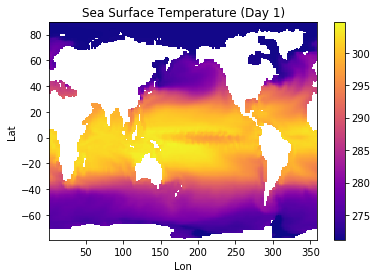

In [78]:
plt.pcolor(lon, lat, tos[0, :, :], cmap = "plasma")
plt.title("Sea Surface Temperature (Day 1)")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('xkcd:White')
plt.show()
#Replace X, Y, Z with what you think are the appropriate dimensions. 
#This may be a little challenging -- ask for help if you need it!

### Now, time to have some fun with your plots! You can add a colorbar, change the colormap (i.e. map different values to different colors), add a title, add some x and y axis labels, and save the plot.

**Colormap fun**: https://matplotlib.org/tutorials/colors/colormaps.html (scroll down to the bottom for some examples)

**Colorbar fun**: https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

## 👉netCDF file cheat sheet👈
[This tutorial](http://www.ceda.ac.uk/static/media/uploads/ncas-reading-2015/10_read_netcdf_python.pdf) was written in Python 2.7, so the print command is slightly different, but it's a helpful read to understand how these files work.

Addditionally: 
1. Import the tools to open a dataset: `from netCDF4 import Dataset`
2. Open a dataset: `ds = Dataset('filename.nc')`
3. View the dataset's attributes: `ds.ncattrs()`
4. Access a specific attribute: `ds.attribute_name`
5. View the dataset's dimensions: `ds.dimensions`
6. View a specific dimension: `ds.dimensions[ 'name of dimension' ]`
7. View the dataset's variables: `ds.variables`
8. View a specific variable: `ds.variables[ 'name of variable' ]`
9. See a variable's values: `ds.variables[ 'name of variable' ][:]`